
# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0; width:750px;"><b>1.1) Import Modules </b>  </p></div>



In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('/kaggle/input/car-price/CarPrice_Assignment.csv')

In [6]:
# check Missing value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

> **NO MISSING VALUE IS AVALIABLE**

In [7]:
# Check Duplication
df.duplicated().sum()

0

> **NO DUPLICATON**

In [8]:
#Check datatype
df.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
# Check the number of unique values of each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
#Check statistics of data set
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# <h1>Insights from Statistics:</h1>

<ol style = "font-family: 'Segoe UI'; font-size: 20px; ">
   <li>
        <strong>Car Variety 🚗🚙:</strong>
        <ul>
            <li>Dataset covers 205 car models, each unique in attributes.</li>
            <li>Sizes, weights, and engine capacities vary across cars.</li>
        </ul>
    </li>
    
   <li>
        <strong>Price Range 💰:</strong>
        <ul>
            <li>Mini Price: 5,118 dollar</li>
            <li>Maxi Price: 45,400 dollar</li>
            <li>Average car price is about $13,276.</li>
        </ul>
   </li>
   <li>
        <strong>Engine Diversity 🛠️:</strong>
        <ul>
            <li>Engines differ in bore diameter (<code>boreratio</code>) and stroke length (<code>stroke</code>).</li>
            <li>Risk ratings (<code>symboling</code>) vary from -2 to 3.</li>
        </ul>
    </li>
<li>
        <strong>Data Distribution 📊:</strong>
        <ul>
            <li>Features like <code>carwidth</code>, <code>curbweight</code>, <code>enginesize</code> show notable variability.</li>
            <li>Potential outliers present in <code>compressionratio</code> and <code>horsepower</code>.</li>
        </ul>
    </li>
</ol>


In [11]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0; width:750px;"><b> </b> 3) Exploratory data analysis </p></div>

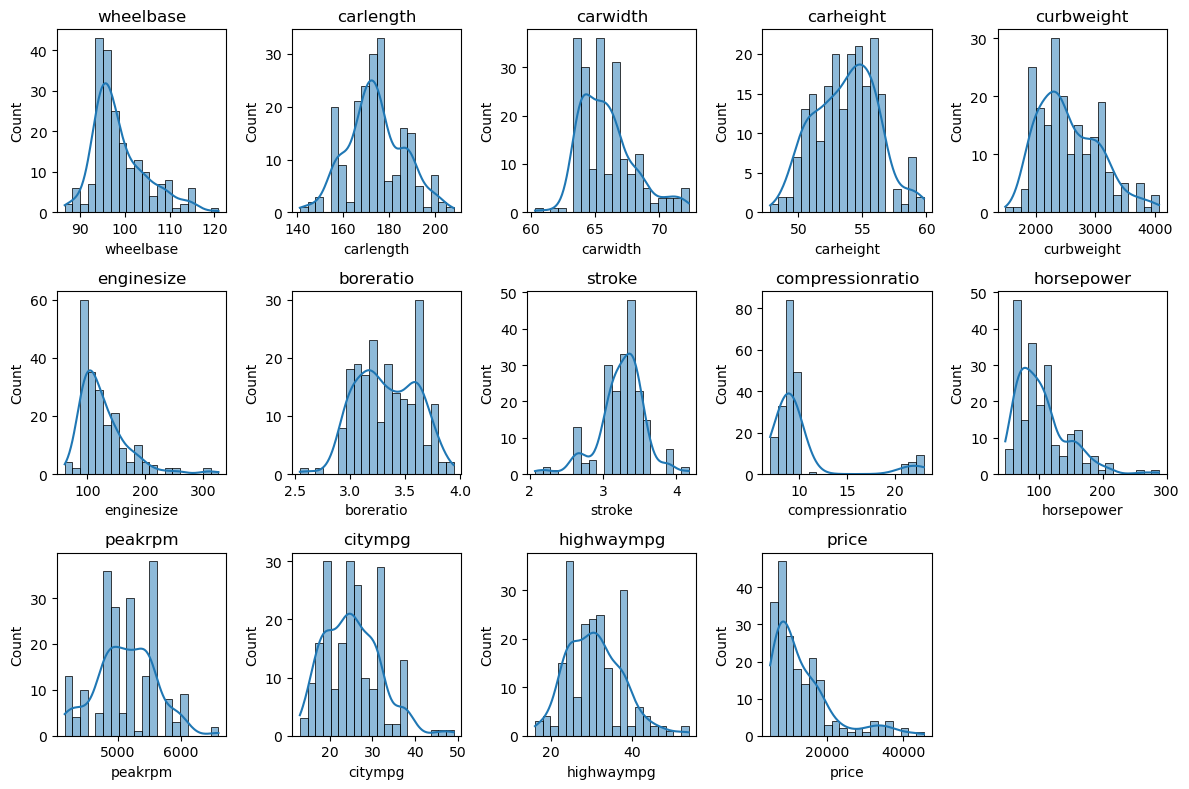

In [12]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

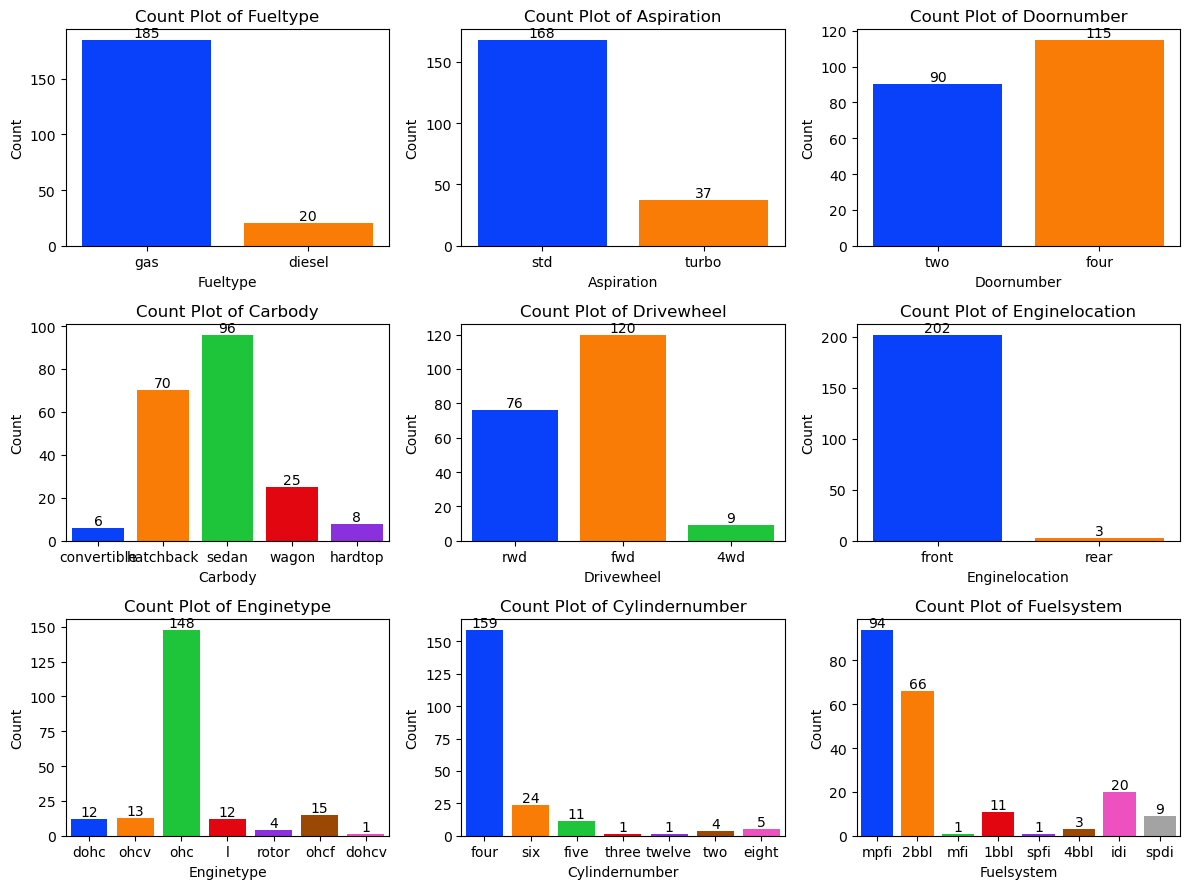

In [14]:
# Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()




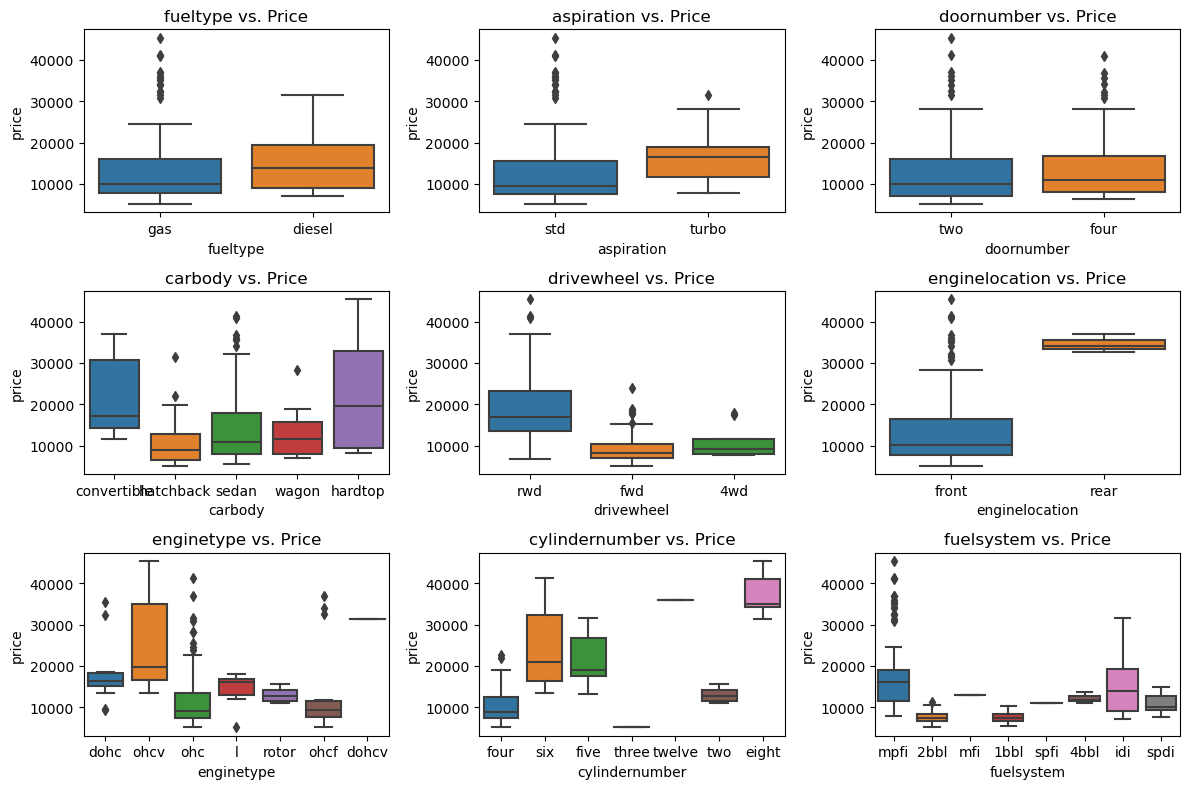

In [17]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

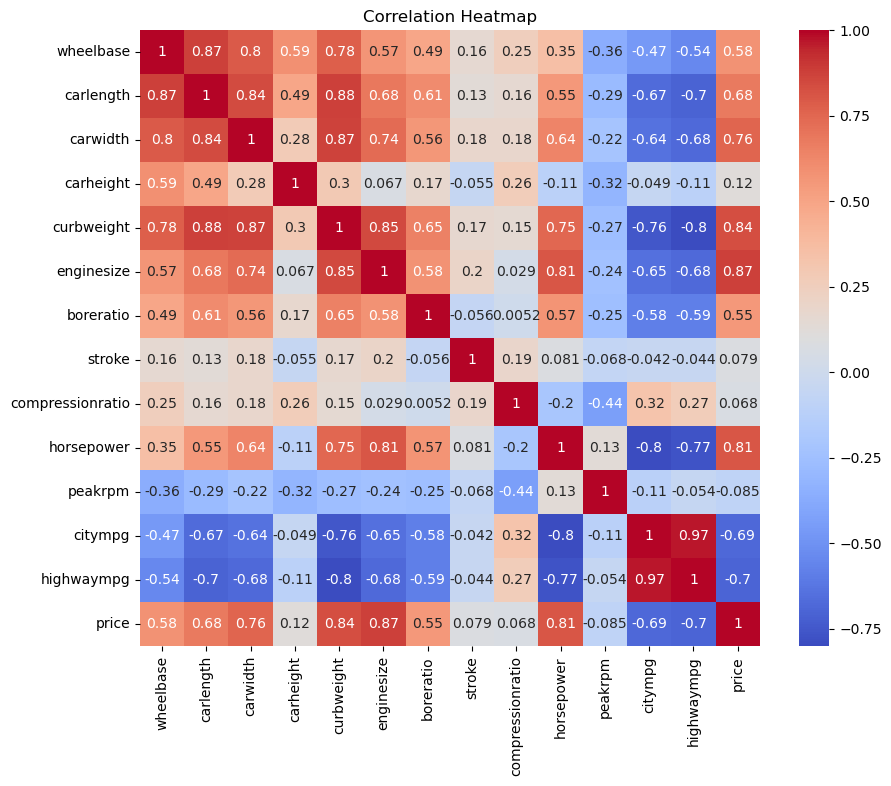

In [18]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FFaaff;font-family:sans-serif;color:#FFffxx;font-size:250%;text-align:center;border-radius:15px 15px;"> Analysis Results 📊🔍 </p>

- We have DataSet > Car Price 👍
- The Shape DataSet = (Rows = 205, columns = 26) 👊

- No null value 🚫📛
- No Duplicated value 🚫🔁

### Some Analyst 👀👀

#### Price cars 💰💥
- Avg price = $13,276 💵

- Min price = $5,118 💲

- Max price = $45,400 💲💲

#### The famous or repeats car > Toyota 🚗😊😊
- Most using car working in Gas around 90% and the average price less than the car working in Diesel. 😨😨
- some category using the car working in Diesel around 10%, but the average price is more than the car working on Gas. 💥💥

- Most cars stand around 82%, also the average price less for Turbo, with turbo cars comprising around 18%. 😪😪

- Approximately 56% of users drive cars with 4 doors, while 46% drive cars with 2 doors; sports cars maintain a similar average price. 👍👍

- Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices. 👍👍

- Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.

- The most common engine type is "ohc," correlating with lower prices.

### When increasing the number of cylinders, the price tends to increase, though the majority of users stick with 4 cylinders.

### As the engine size increases, so does the price.

### The wheelbase, car length, and car width have an effect on the price, but the car height doesn't seem to have any significant impact. 😨😨


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0; width:750px;"><b> </b> 4) Data Pre-Processing </p></div>

In [19]:
# Extract brand and model from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature engineering
df['power_to_weight_ratio'] = df['horsepower'] / df['curbweight']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_enginesize'] = np.log(df['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [26]:
def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    # Select only the top 12 numerical features
    top12_features = data_copy.select_dtypes(include='number').columns[:12]
    data_copy = data_copy[top12_features]

    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    styled_moments_df = moments_df.style.set_table_styles([
        {'selector': 'th', 'props': [('font-size', '18px'), ('font-weight', 'bold'), ('color', '#FFFFFF'), ('background-color', '#34495E'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '16px'), ('text-align', 'center')]},
        {'selector': '', 'props': [('border-collapse', 'collapse'), ('border', '2px solid black')]}
    ])
    display(styled_moments_df)

# Example usage
display_statistical_moments(df)



Statistical Moments:



,Mean,Median,Standard Deviation,Skewness,Kurtosis
car_ID,103.000000,103.000000,59.322565,0.000000,-1.200000
symboling,0.834146,1.000000,1.245307,0.211072,-0.676271
fueltype,0.902439,1.000000,0.297446,-2.732619,5.520976
aspiration,0.180488,0.000000,0.385535,1.673832,0.809515
doornumber,0.439024,0.000000,0.497483,0.247552,-1.957916
carbody,2.614634,3.000000,0.859081,-0.665301,1.024023
drivewheel,1.326829,1.000000,0.556171,-0.058352,-0.677276
enginelocation,0.014634,0.000000,0.120377,8.143531,64.950693
wheelbase,-0.000000,-0.292420,1.002448,1.050214,1.017039
carlength,0.000000,-0.069006,1.002448,0.155954,-0.082895


# <div style="color:blue;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:blue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0; width:750px;"><b> </b> 5) Train the Model </p></div>

In [20]:
# Splitting the dataset
X = df.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8615670883410504
Mean Squared Error: 10928450.668435916


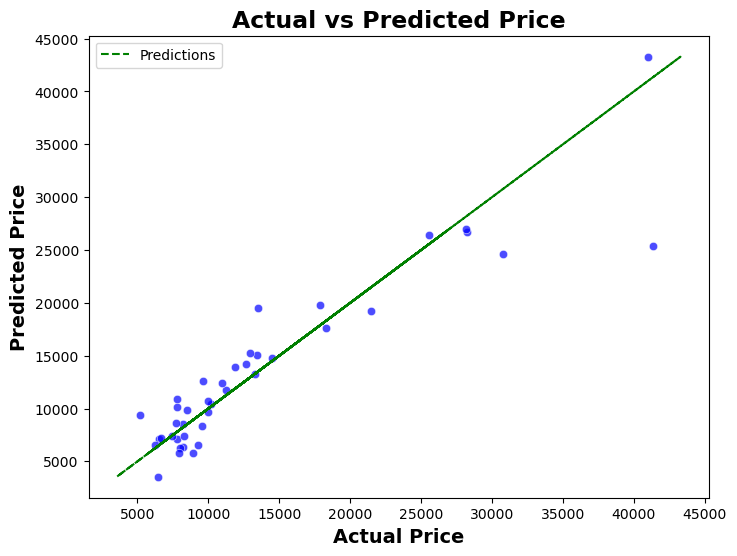

In [24]:
# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot(y_pred, y_pred, color='green', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=17, fontweight='bold')
plt.xlabel('Actual Price', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

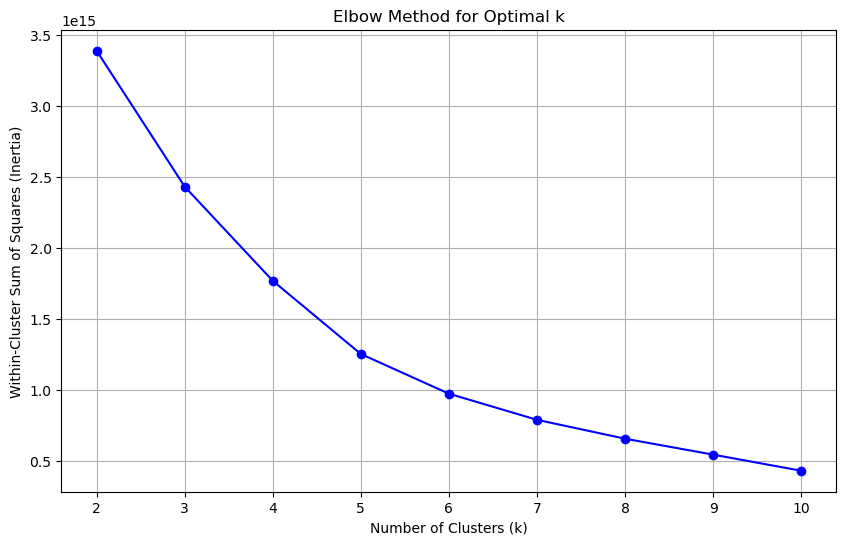

In [27]:
# Extract features for clustering (exclude the 'quality' column)
from sklearn.cluster import KMeans
# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

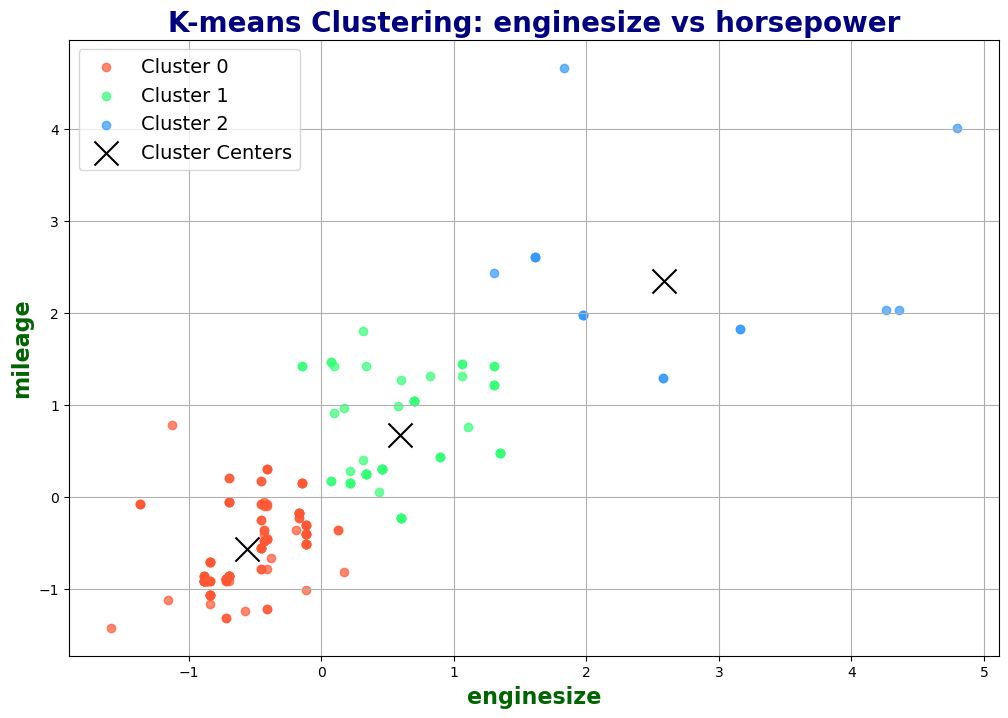

In [32]:
km = KMeans(n_clusters=3, random_state=42)  # Specify the number of clusters
X['cluster'] = km.fit_predict(X[['enginesize', 'horsepower']])  # Fit K-means and assign cluster labels

# Plot clusters with cluster centers
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['#FF5733', '#33FF77', '#3399FF']

# Plot each cluster using a different color
for cluster_label, color in zip(sorted(X['cluster'].unique()), colors):
    cluster_data = X[X['cluster'] == cluster_label]
    plt.scatter(cluster_data['enginesize'], cluster_data['horsepower'], label=f'Cluster {cluster_label}', alpha=0.7, color=color)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')

# Set plot title and labels
plt.title('K-means Clustering: enginesize vs horsepower', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('enginesize', fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel('mileage', fontsize=16, fontweight='bold', color='darkgreen')

# Add legend
plt.legend(fontsize=14)
plt.grid(True)

plt.show()


In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15,30760.000,24644.498946,6115.501054
9,17859.167,19770.234284,-1911.067284
100,9549.000,8323.732428,1225.267572
132,11850.000,13885.801565,-2035.801565
68,28248.000,26718.615840,1529.384160
95,7799.000,7079.308256,719.691744
159,7788.000,10106.850947,-2318.850947
162,9258.000,6570.571035,2687.428965
147,10198.000,10418.264330,-220.264330
182,7775.000,10904.998473,-3129.998473
